# The Email spam detection problem is a set of Email meesages need to be tagged as "spam" and "ham"

## Importing Lib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
np.set_printoptions(threshold=np.inf)

## Import Data 

In [1]:
data=pd.read_csv("C:\Users\Bhoomika\spam\spam.csv",encoding=('latin-1'))
data = csv.reader(spam)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3072626625.py, line 1)

# Data Cleaning

In [7]:
df_sms=data
df_sms.head()

NameError: name 'data' is not defined

In [8]:
#drop unwanted columns
df_sms=df_sms.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df_sms = df_sms.rename(columns={"v1":"label", "v2":"sms"})
df_sms.head()

NameError: name 'df_sms' is not defined

## Check for missing values

In [6]:
df_sms.isnull().sum()

label    0
sms      0
dtype: int64

In [7]:
df_sms.shape

(5572, 2)

In [8]:
df_sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label    5572 non-null object
sms      5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


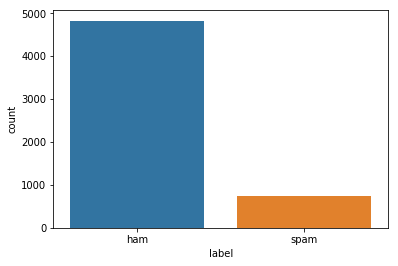

In [9]:
import seaborn as sns
sns.countplot(x="label", data=df_sms)

In [10]:
df_sms.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


  label                                                sms  length
0   ham  Go until jurong point, crazy.. Available only ...     111
1   ham                      Ok lar... Joking wif u oni...      29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3   ham  U dun say so early hor... U c already then say...      49
4   ham  Nah I don't think he goes to usf, he lives aro...      61


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000204914F59B0>,
      dtype=object)

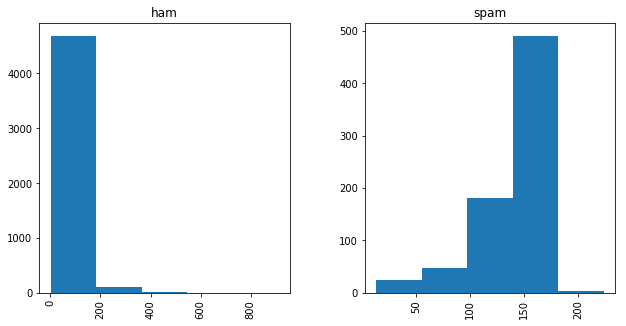

In [17]:
df_sms['length'] = df_sms['sms'].apply(len)
print(df_sms.head())
df_sms.hist(column='length', by='label', bins=5,figsize=(10,5))

changing label values to 0 and 1

In [19]:
df_sms.loc[:,'label'] = df_sms.label.map({'ham':0, 'spam':1})
print(df_sms.shape)
df_sms.head()

(5572, 3)


,label,sms,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


splitting data into train and test (80-20)

In [69]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_sms['sms'], 
                                                    df_sms['label'],test_size=0.20, 
                                                    random_state=1)

#train_test_split(x, y, test_size)
X_train.head()

1642                             Sleeping nt feeling well
2899    Come aftr  &lt;DECIMAL&gt; ..now i m cleaning ...
480                          Almost there, see u in a sec
3485                     Yeah, probably earlier than that
157     Hello, my love. What are you doing? Did you ge...
Name: sms, dtype: object

processing data using CountVectorizer and TfidfVectorizer which will be the input for algorithm

In [70]:
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)
# count and fit
# Transform testing data and return the matrix. 
testing_data = count_vector.transform(X_test)

In [95]:
a=training_data.toarray()
a[[2]]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [96]:
count_vector.inverse_transform(a[[2]])

[array(['house', 'instructions', 'repeat', 'road', 'ur', 'wat'],
       dtype='<U34')]

In [73]:
count_vector=TfidfVectorizer(stop_words='english')
training_data = count_vector.fit_transform(X_train)
testing_data = count_vector.transform(X_test)

In [74]:
#count_vector.vocabulary_

building MultinomialNB model

In [75]:
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data,y_train)
predictions = naive_bayes.predict(testing_data)

In [76]:
actual=np.array(y_test)
actual

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [77]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [78]:
y_test.shape

(1115,)

In [79]:
c=0
for i in range(len(predictions)):
  if predictions[i]==actual[i]:
    c=c+1
c

1093

In [80]:
1093/1115

0.9802690582959641

In [81]:
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('F1 score: {}'.format(f1_score(y_test, predictions)))

Accuracy score: 0.9802690582959641
Precision score: 1.0
Recall score: 0.841726618705036
F1 score: 0.9140624999999999


In [64]:
from sklearn import metrics
print(metrics.classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99       976
          1       1.00      0.84      0.91       139

avg / total       0.98      0.98      0.98      1115



In [82]:
from sklearn.metrics import confusion_matrix
metrics.confusion_matrix(y_test, predictions)

array([[976,   0],
       [ 22, 117]], dtype=int64)

In [ ]:
#consider entire records for training in order to get good prediction 

In [83]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_sms['sms'], 
                                                    df_sms['label'],test_size=0.01, 
                                                    random_state=1)

#train_test_split(x, y, test_size)

count_vector = CountVectorizer()
# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)
# count and fit
# Transform testing data and return the matrix. 
testing_data = count_vector.transform(X_test)
count_vector=TfidfVectorizer(stop_words='english')
training_data = count_vector.fit_transform(X_train)
testing_data = count_vector.transform(X_test)
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data,y_train)
predictions = naive_bayes.predict(testing_data)

In [84]:
!pip install html2text
import imaplib
import email
from bs4 import BeautifulSoup
import html2text

host = 'imap.gmail.com'
username = 'tstranger725@gmail.com'
password = 'cxqopbbifmdtyynn'

h = html2text.HTML2Text()
h.ignore_links = True

def get_inbox():
    mail = imaplib.IMAP4_SSL(host)
    mail.login(username, password)
    mail.select("inbox")
    _, search_data = mail.search(None, 'UNSEEN')
    my_message = []
    for num in search_data[0].split():
        email_data = {}
        _, data = mail.fetch(num, '(RFC822)')
        # print(data[0])
        _, b = data[0]
        email_message = email.message_from_bytes(b)
        for header in ['subject', 'to', 'from', 'date']:
            print("{}: {}".format(header, email_message[header]))
            email_data[header] = email_message[header]
        for part in email_message.walk():
            if part.get_content_type() == "text/plain":
                body = part.get_payload(decode=True)
                email_data['body'] = body.decode()
            elif part.get_content_type() == "text/html":
                html_body = part.get_payload(decode=True)

                soup = BeautifulSoup(html_body, features="html.parser")

                # kill all script and style elements
                for script in soup(["script", "style"]):
                    script.extract()    # rip it out

                # get text
                text = soup.get_text()

                email_data['html_body'] = h.handle(str(text))
                print( email_data['html_body'])
                

        my_message.append(email_data)
    return my_message
    

if __name__ == "__main__":
    my_inbox = get_inbox()
    print(my_inbox)
# print(search_data)

# x = re.search("^'html'.*'\n'$", my_message)


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


subject: WHAT'S UP 
to: "tstranger725@gmail.com" <tstranger725@gmail.com>
from: S Edigar <sahanaedigarhp@gmail.com>
date: Thu, 9 Jun 2022 22:48:47 +0530
XXXMobileMovieClub: To use your credit, click the WAP link in the next txt
message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL


[{'subject': "WHAT'S UP ", 'to': '"tstranger725@gmail.com" <tstranger725@gmail.com>', 'from': 'S Edigar <sahanaedigarhp@gmail.com>', 'date': 'Thu, 9 Jun 2022 22:48:47 +0530', 'html_body': 'XXXMobileMovieClub: To use your credit, click the WAP link in the next txt\nmessage or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL\n\n'}]


In [85]:
my_inbox

[{'subject': "WHAT'S UP ",
  'to': '"tstranger725@gmail.com" <tstranger725@gmail.com>',
  'from': 'S Edigar <sahanaedigarhp@gmail.com>',
  'date': 'Thu, 9 Jun 2022 22:48:47 +0530',
  'html_body': 'XXXMobileMovieClub: To use your credit, click the WAP link in the next txt\nmessage or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL\n\n'}]

In [101]:
df = pd.DataFrame(my_inbox)
a=df.html_body.values[0]
df

,date,from,html_body,subject,to
0,"Thu, 9 Jun 2022 22:48:47 +0530",S Edigar <sahanaedigarhp@gmail.com>,"XXXMobileMovieClub: To use your credit, click ...",WHAT'S UP,"""tstranger725@gmail.com"" <tstranger725@gmail.com>"


In [102]:
a=pd.Series(a)
a

0    XXXMobileMovieClub: To use your credit, click ...
dtype: object

In [103]:
#a=pd.Series("free reward and a free mobile update woth $10")

In [107]:
#a=pd.Series("good morning")

In [108]:
testing_data_new = count_vector.transform(a)
pred=naive_bayes.predict(testing_data_new)
if pred[0]==1:
    print("spam")
else:
    print("ham")

ham


In [109]:
naive_bayes.predict_proba(testing_data_new)
# 0 , 1
# Ham , Spam

array([[0.99569216, 0.00430784]])

In [ ]:
50% - spam send to indbox
50%+ - 70%  spam send to indbox with warning
70% - 90% spam send to spam 
90% delete

In [102]:
pred

array([1], dtype=int64)

In [99]:
pred[0]

1

In [108]:
a=[0,1,0,1,0]
a[3]

1